# 1. import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use({'figure.figsize':(25,20)})

In [3]:
!cd Melbourne_daily_temp/

In [4]:
!cd Melbourne_daily_temp/

In [5]:
df = pd.read_csv("Melbourne_daily_temp/data/daily-minimum-temperatures-in-me.csv")

In [6]:
df.head()

Date Daily minimum temperatures in Melbourne, Australia, 1981-1990
0  1981-01-01                                               20.7           
1  1981-01-02                                               17.9           
2  1981-01-03                                               18.8           
3  1981-01-04                                               14.6           
4  1981-01-05                                               15.8

# 2. data clean

In [7]:
df = df.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'Temp','Date':'Date' })

## 2. 1 Date
第一列Date为日期，也就是时间序列，我们将第一列的数据类型转换为pandas中的datatime日期类型，并将这一列作为数据的索引，便于后续处理。

In [8]:
df['Date']

0       1981-01-01
1       1981-01-02
2       1981-01-03
3       1981-01-04
4       1981-01-05
           ...    
3645    1990-12-27
3646    1990-12-28
3647    1990-12-29
3648    1990-12-30
3649    1990-12-31
Name: Date, Length: 3650, dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df = df.set_index('Date')

## 2.2 Temperature

In [11]:
df['Temp'] = pd.to_numeric(df['Temp'],errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3647 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [13]:
df.describe()

Temp
count  3647.000000
mean     11.186647
std       4.061671
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000

# 3. data virtualizaiton 

In [14]:
import pandas_profiling as ppf

In [15]:
ppf.ProfileReport(df)

## 3.1 折线图

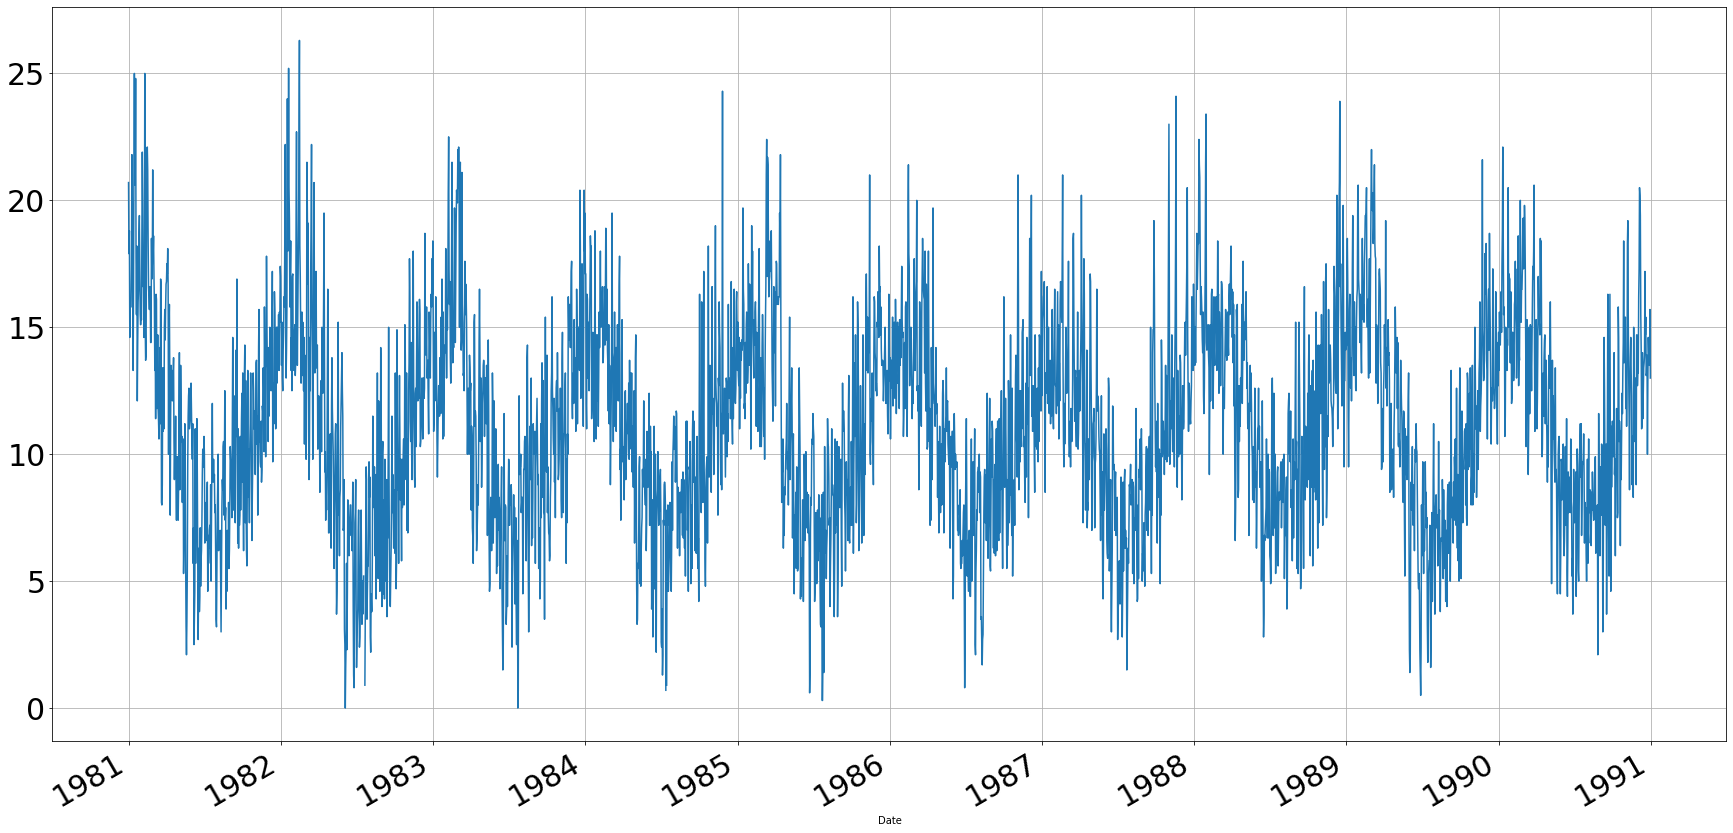

In [16]:
df['Temp'].plot(figsize=(30,15))
plt.tick_params(labelsize=30)
plt.grid()

## 3.2 散点图

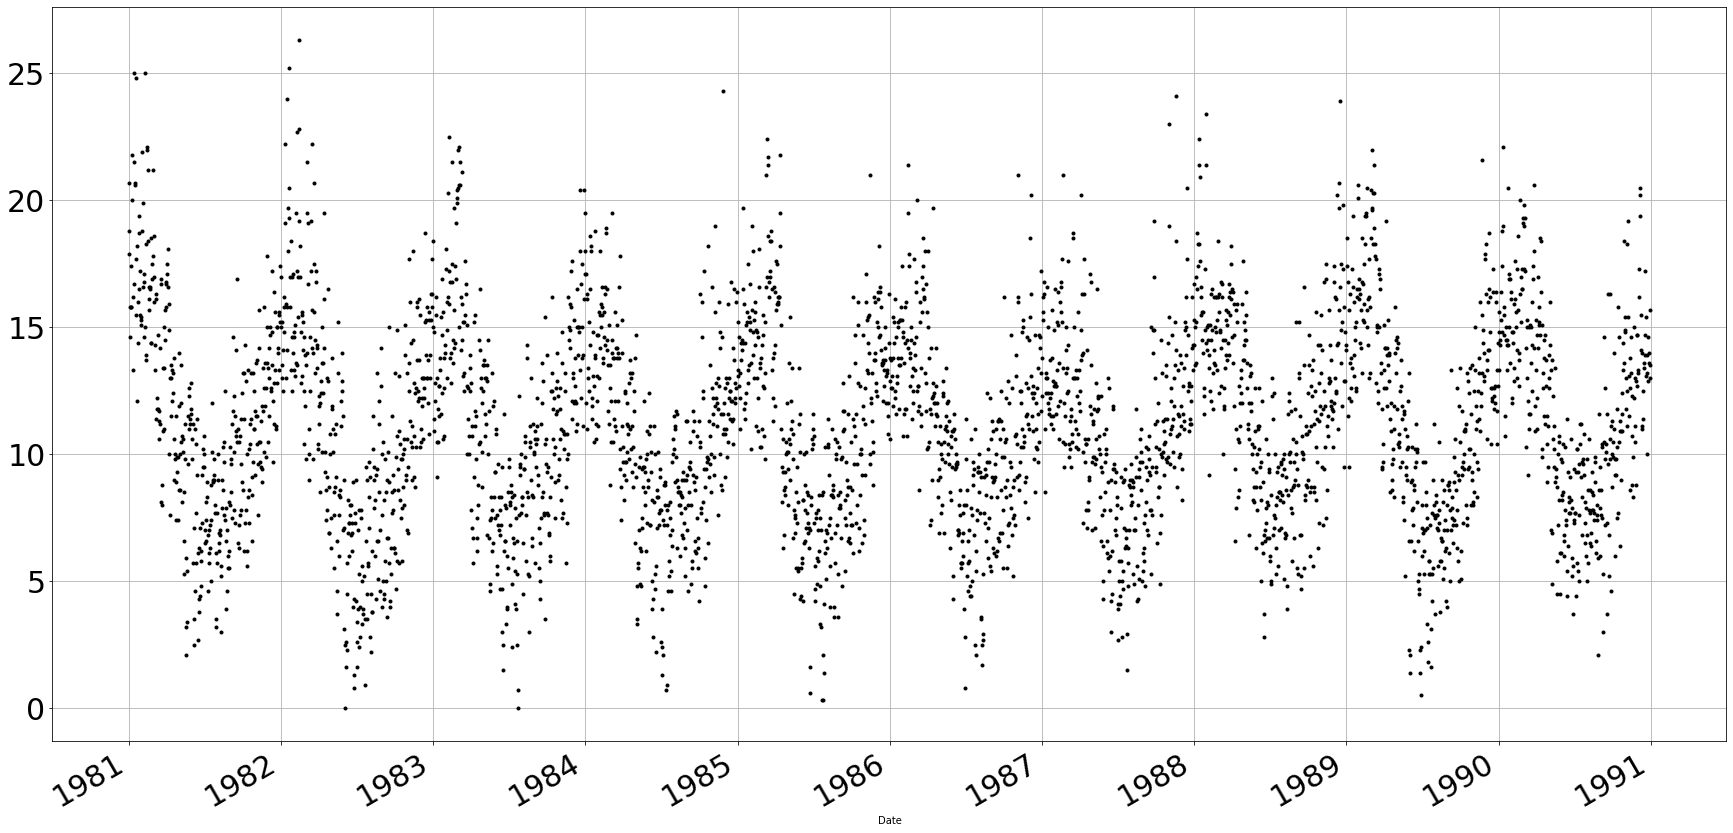

In [17]:
df['Temp'].plot(style = 'k.', figsize = (30,15))
plt.tick_params(labelsize = 30)
plt.grid()

## 3.3 直方图

<AxesSubplot:ylabel='Frequency'>

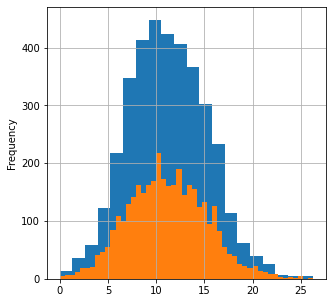

In [18]:
plt.style.use({'figure.figsize':(5,5)})
df['Temp'].plot(kind = 'hist', bins = 20)

df['Temp'].hist(bins = 50)

## 3.4 堆积面积图

<AxesSubplot:xlabel='Date'>

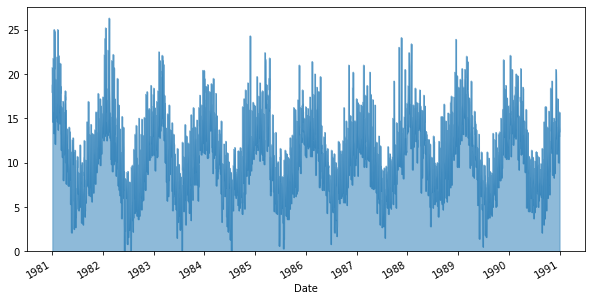

In [19]:
plt.style.use({'figure.figsize' : (10,5)})
df['Temp'].plot.area(stacked = False)

## 3.5 KDE图

<AxesSubplot:ylabel='Density'>

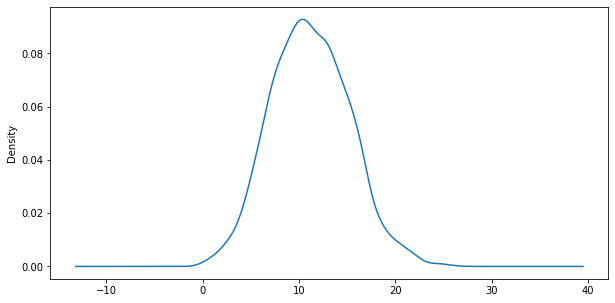

In [20]:
plt.style.use({'figure.figsize': (10,5)})
df['Temp'].plot(kind = 'kde')

## 3.6 热力图
> 将1982年每一个月的最低气温用热力图展示出来

In [21]:
plt.style.use({'figure.figsize' : (20, 8)})
## resample 
df['1982'].resample('M').mean().T

Date  1982-01-31  1982-02-28  1982-03-31  1982-04-30  1982-05-31  1982-06-30  \
Temp   16.567742   15.921429   14.935484       11.47    9.583871    5.606667   

Date  1982-07-31  1982-08-31  1982-09-30  1982-10-31  1982-11-30  1982-12-31  
Temp    4.927586    7.903226        7.28    9.545161   12.486667   13.754839

<AxesSubplot:xlabel='Date'>

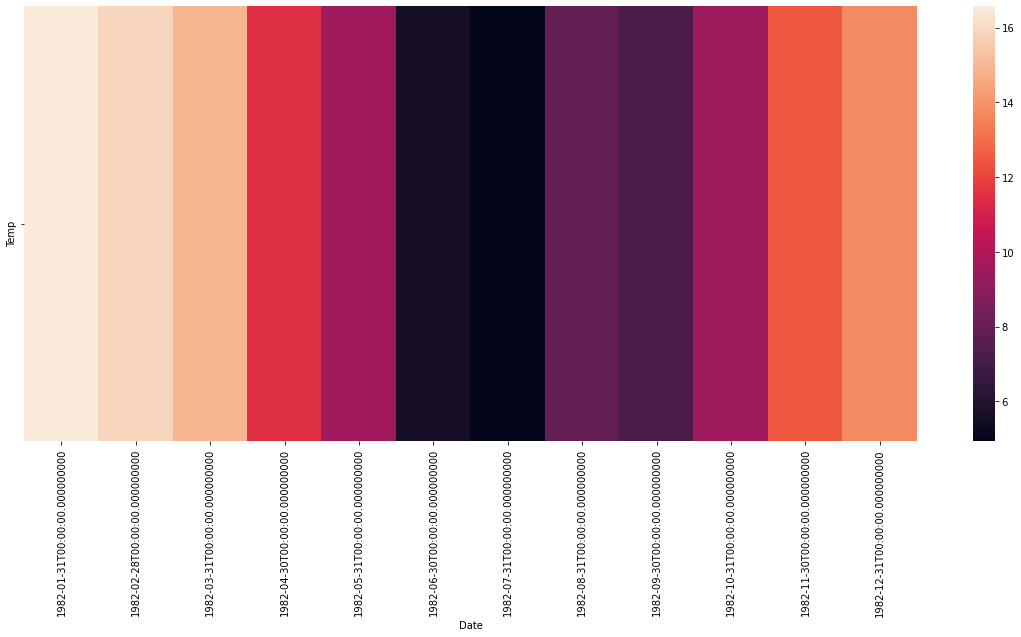

In [22]:
sns.heatmap(df['1982'].resample('M').mean().T)

# 4 绘制每年气温变化的直线图，箱型图，热力图，小提琴图
我们刚刚将日期列转换成了pandas中的datetime类型，我们可以直接通过年份和日期索引选择指定时间的数据

In [23]:
df['1982']

Temp
Date            
1982-01-01  17.0
1982-01-02  15.0
1982-01-03  13.5
1982-01-04  15.2
1982-01-05  13.0
...          ...
1982-12-27  15.3
1982-12-28  16.3
1982-12-29  15.8
1982-12-30  17.7
1982-12-31  16.3

[365 rows x 1 columns]

下面实用pandas的groupby操作，把每年和每天的温度筛选出来python处理数据的风骚操作pandas 之 groupby&agg

In [24]:

groups = df.groupby(pd.Grouper(freq = '1Y'))['Temp']
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years

1981  1982  1983  1984  1985  1986  1987  1988  1989  1990
0    20.7  17.0  18.4  19.5  13.3  12.9  12.3  15.3  14.3  14.8
1    17.9  15.0  15.0  17.1  15.2  13.8  13.8  14.3  17.4  13.3
2    18.8  13.5  10.9  17.1  13.1  10.6  15.3  13.5  18.5  15.6
3    14.6  15.2  11.4  12.0  12.7  12.6  15.6  15.0  16.8  14.5
4    15.8  13.0  14.8  11.0  14.6  13.7  16.2  13.6  11.5  14.3
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
360  15.5  15.3  13.9  12.2  11.5  14.6  16.2   9.5  13.3  14.0
361  13.3  16.3  11.1  12.0  10.8  14.2  14.2  12.9  11.7  13.6
362  15.6  15.8  16.1  12.6  12.0  13.2  14.3  12.9  10.4  13.5
363  15.2  17.7  20.4  16.0  16.3  11.7  13.3  14.8  14.4  15.7
364  17.4  16.3  18.0  16.4  14.4  17.2  16.7  14.1  12.7  13.0

[365 rows x 10 columns]

这个就是把十年的每一天的数据都给做了出来，每一列代表年，每一行是天。下面绘制图像进行可视化上面这个表：

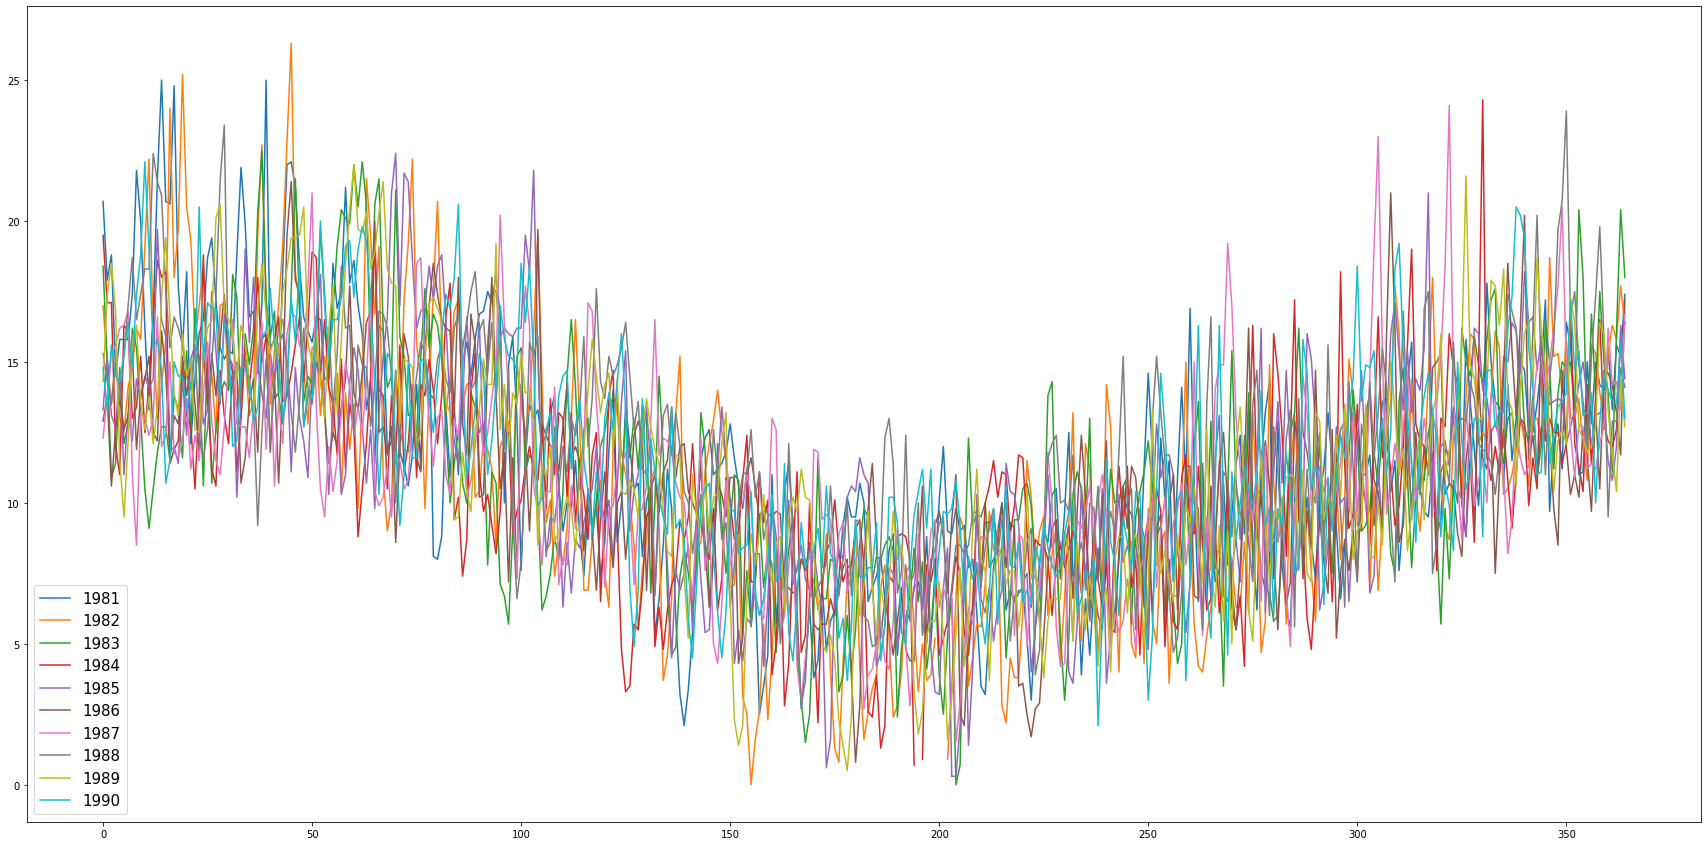

In [25]:
plt.style.use({'figure.figsize' : (30, 15)})
years.plot()

plt.legend(fontsize = 15, markerscale = 15)

## 4.1 折线图
绘制每一年的折线图，结果就不全显示了

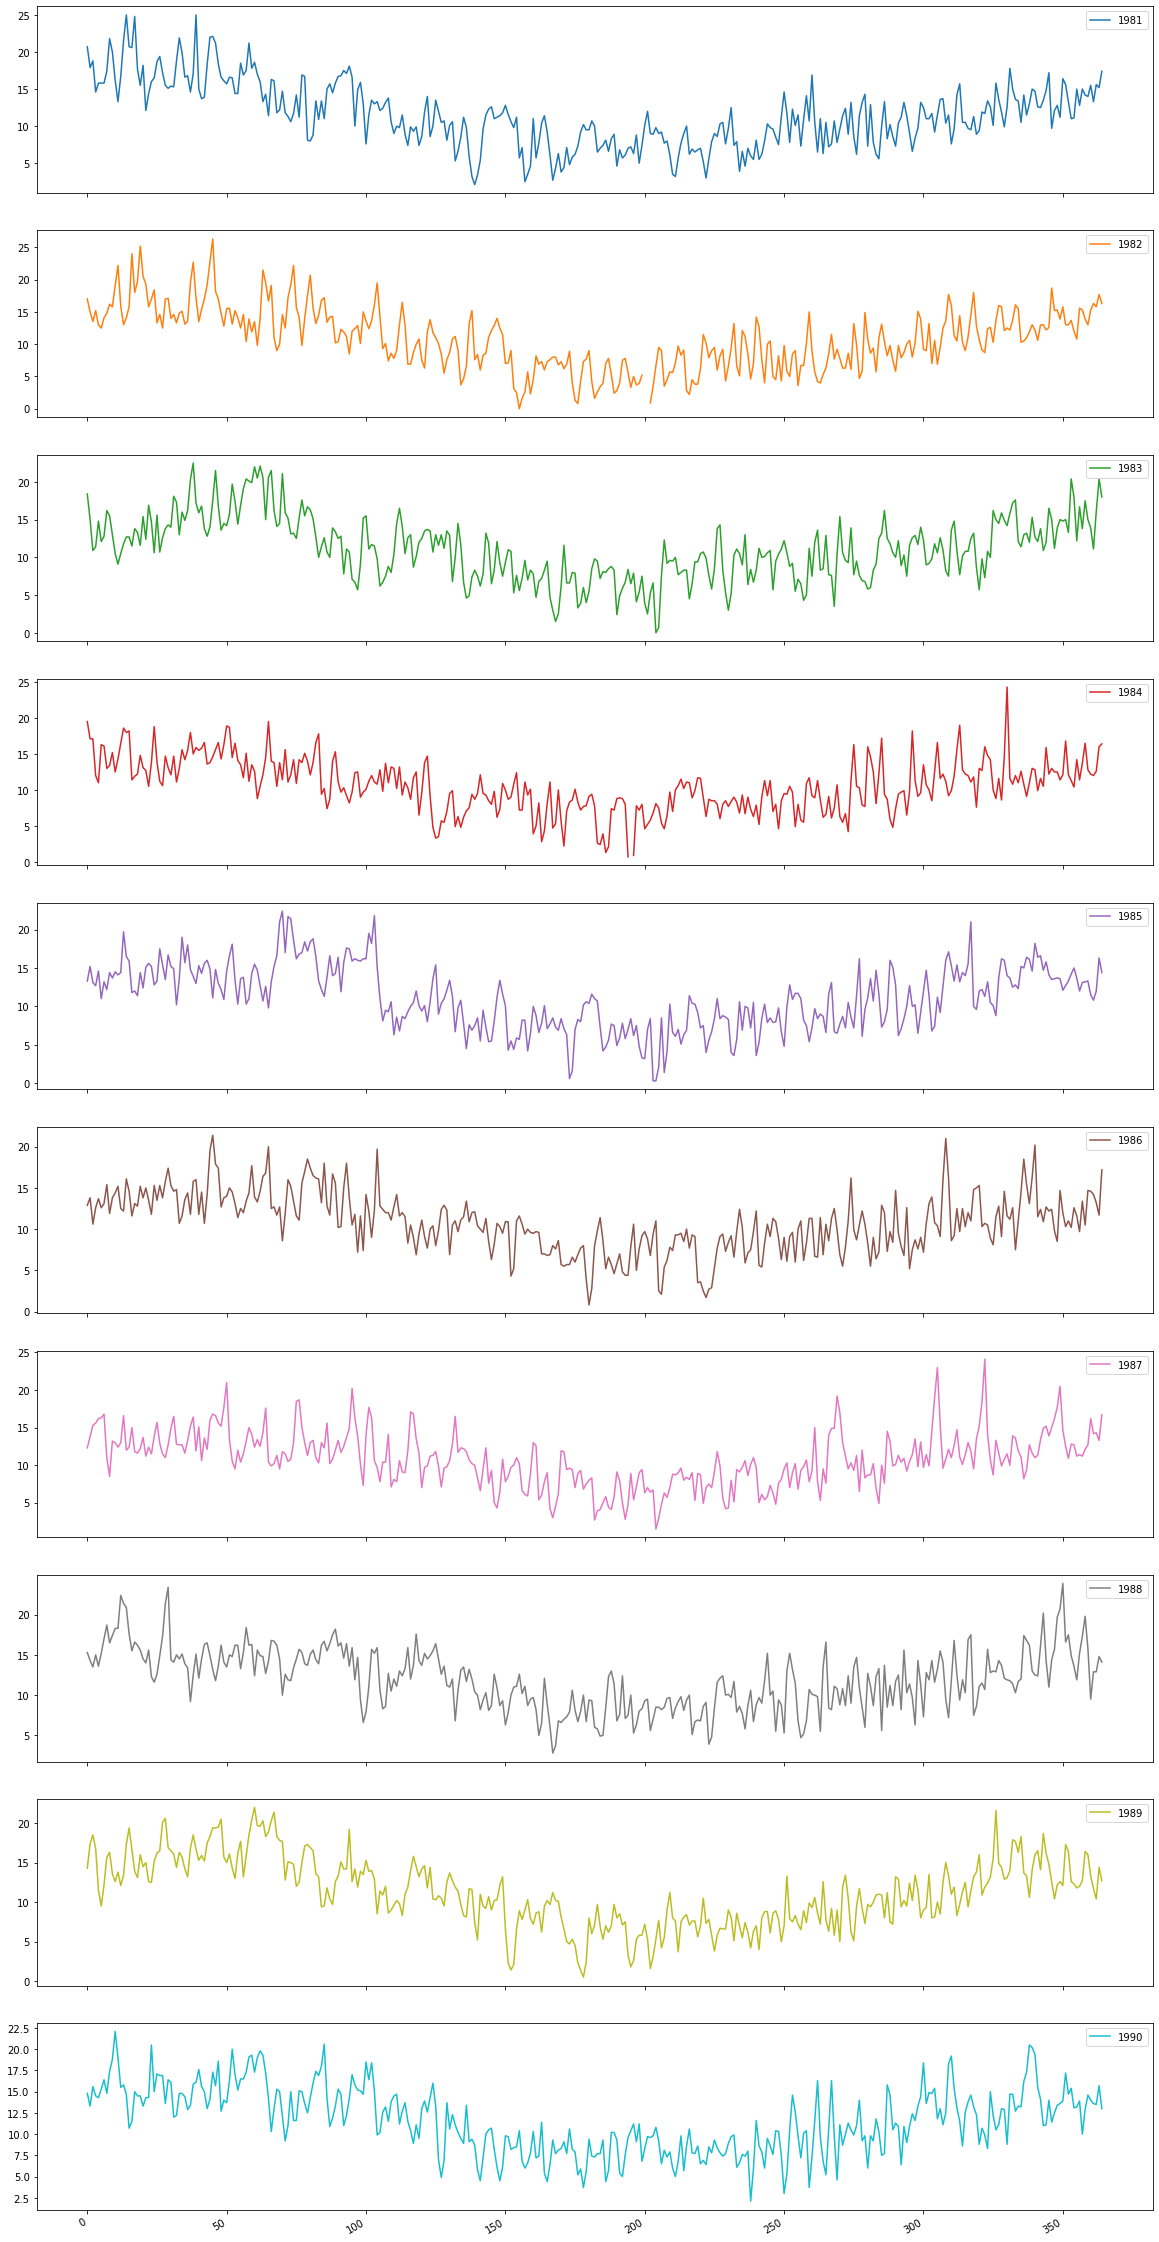

In [59]:
""""""
years.plot(subplots = True, figsize = (20, 45))
plt.show()

## 4.2 箱型图
这个图可以很容易的看出离群点和数据的分布

<AxesSubplot:>

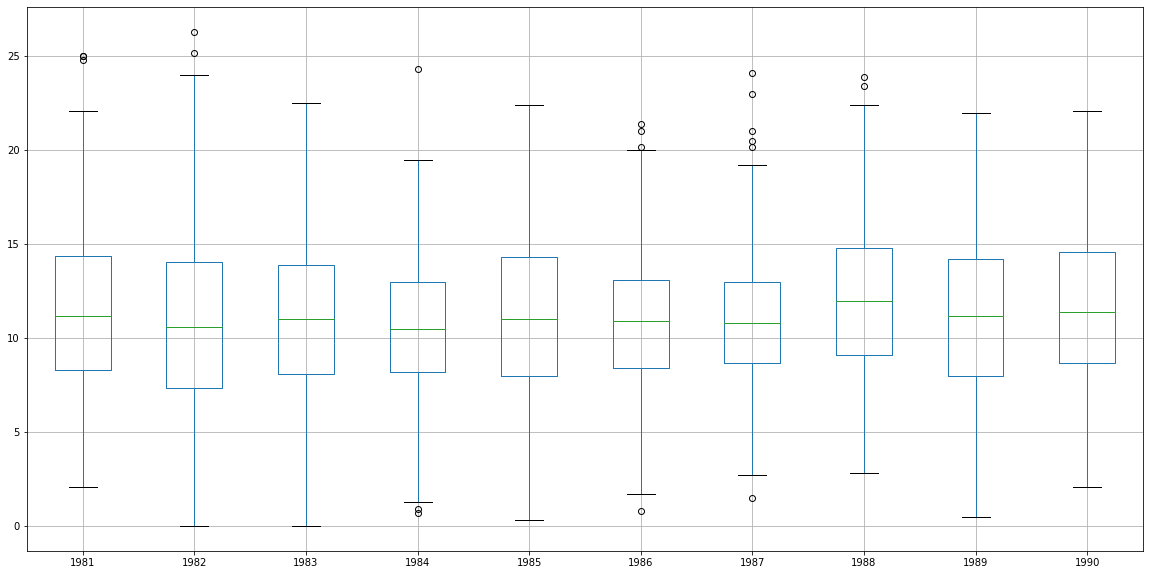

In [60]:
years.boxplot(figsize = (20,10))

## 4.3 热力图

'颜色越黑，表示温度越低， 颜色越亮，表示温度越高'

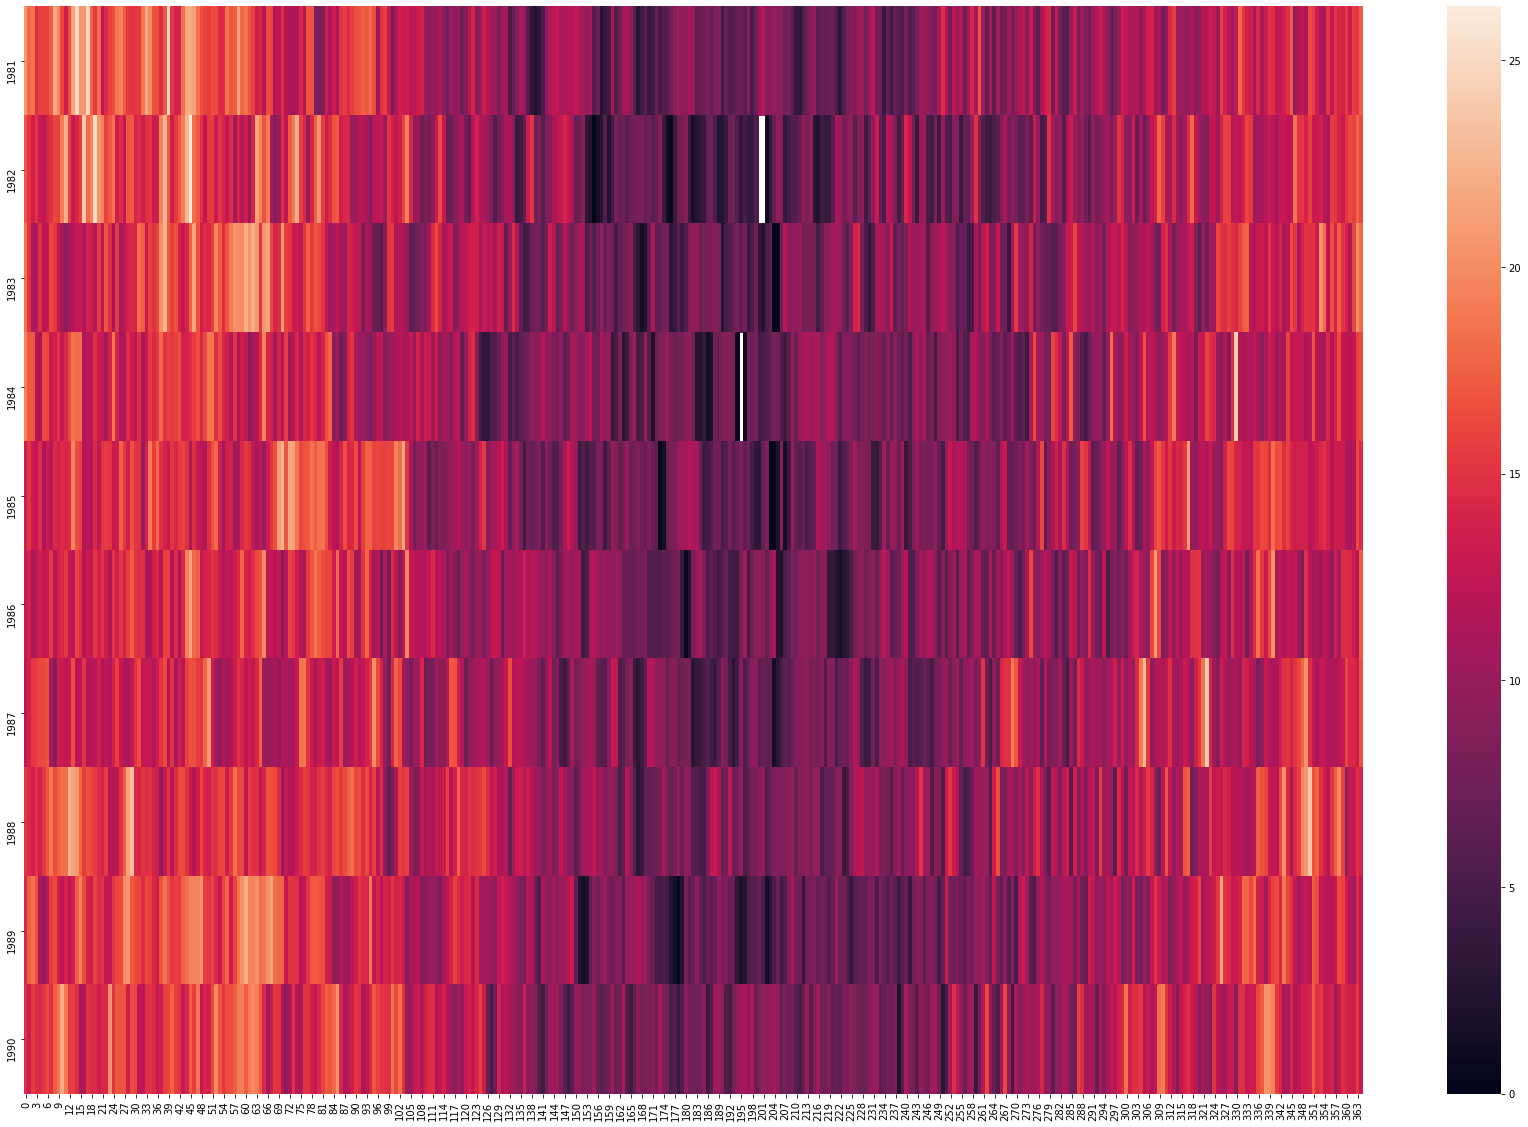

In [61]:
plt.style.use({'figure.figsize' : (30,20)})
sns.heatmap(years.T)
"""颜色越黑，表示温度越低， 颜色越亮，表示温度越高"""

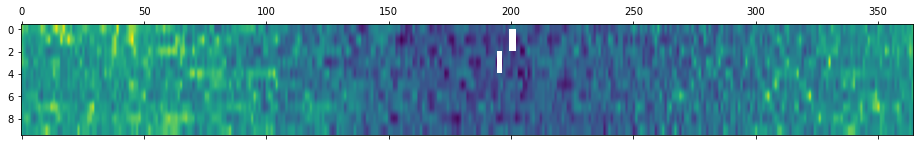

In [62]:
plt.matshow(years.T, interpolation = None, aspect = 'auto')

## 4.4 每一年气温的直方图

array([[<AxesSubplot:title={'center':'1981'}>,
        <AxesSubplot:title={'center':'1982'}>,
        <AxesSubplot:title={'center':'1983'}>],
       [<AxesSubplot:title={'center':'1984'}>,
        <AxesSubplot:title={'center':'1985'}>,
        <AxesSubplot:title={'center':'1986'}>],
       [<AxesSubplot:title={'center':'1987'}>,
        <AxesSubplot:title={'center':'1988'}>,
        <AxesSubplot:title={'center':'1989'}>],
       [<AxesSubplot:title={'center':'1990'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

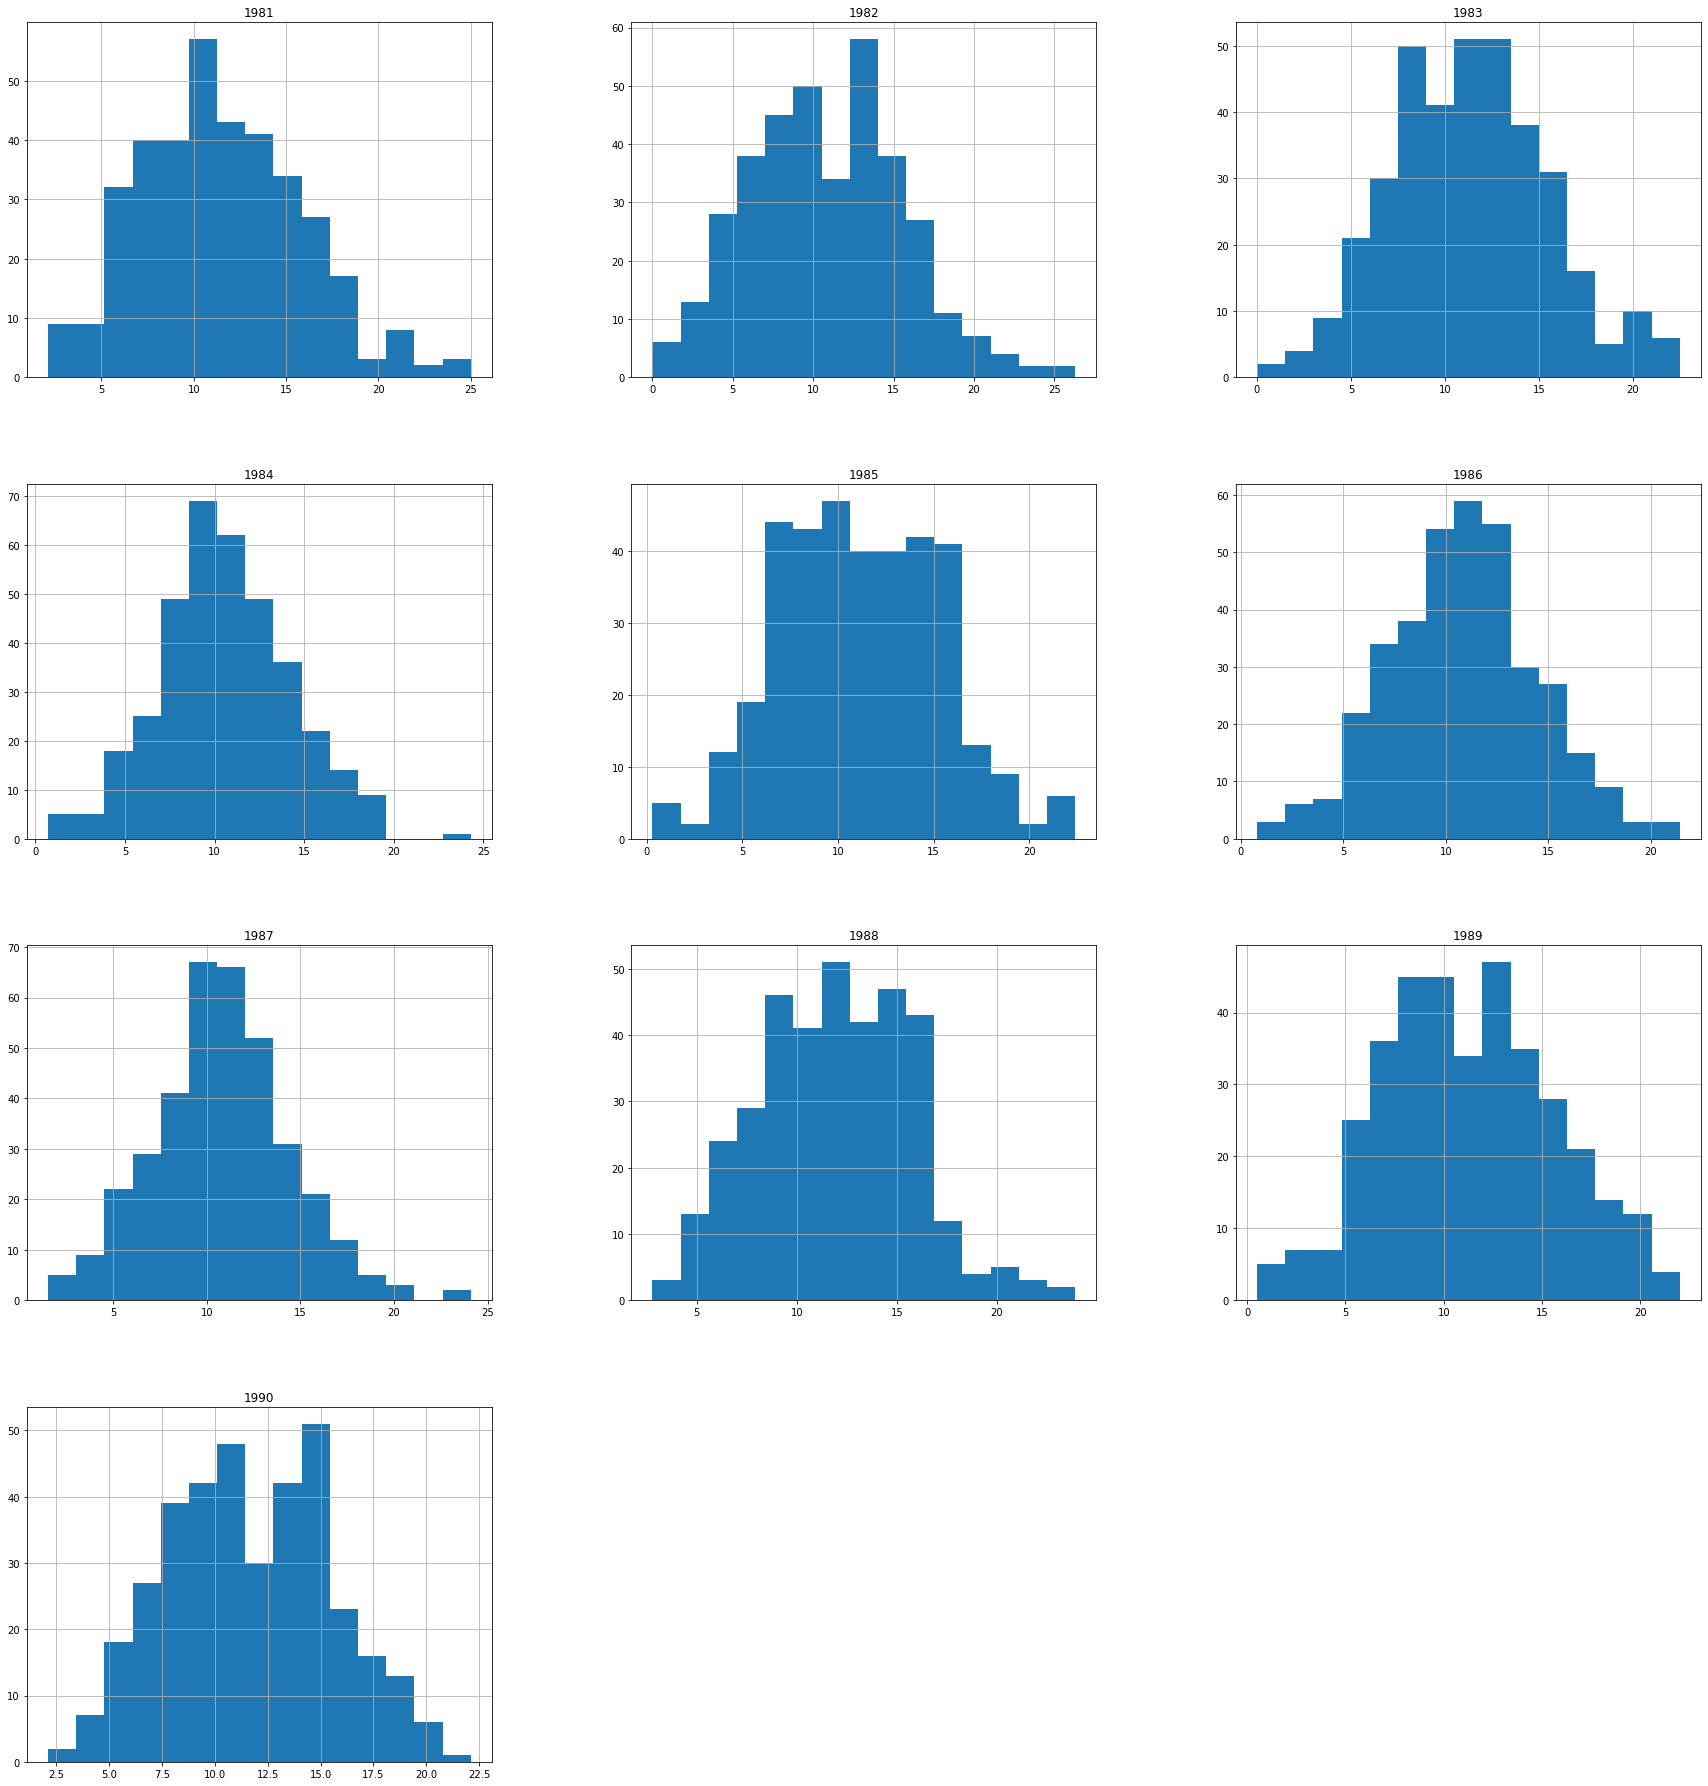

In [63]:
plt.style.use({'figure.figsize': (30,32)})
years.hist(bins = 15)

## 4.5 months
绘制1985年12个月每天的气温数据，这个和上面的异曲同工，只不过那个是每一年的每一天，这个是每一个月的每一天。

In [64]:
# 选取1985年12个月每天的气温数据

groups_month = df['1985'].groupby(pd.Grouper(freq = '1M'))['Temp']

months = pd.concat([pd.DataFrame(x[1].values) for x in groups_month], axis = 1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months

1     2     3     4     5     6     7     8     9     10    11    12
0   13.3  14.9  14.3  16.4   9.4   4.3  11.6   7.0  10.3  10.5   7.4  12.3
1   15.2  10.2  15.5  11.9  10.1   5.5  11.0   5.1   7.9   8.6  11.2  15.2
2   13.1  13.6  14.7  15.7   8.0   4.4  10.7   6.3   8.5   7.2   9.2  15.0
3   12.7  19.0  12.7  17.6  10.6   5.9   7.3   6.9   7.9  11.4  12.6  16.4
4   14.6  15.7  10.7  17.5  13.6   5.7   4.2  11.4   8.0  16.2  16.0  16.1
5   11.0  18.0  12.6  15.9  15.4   8.2   4.7  10.4   9.8   6.1  17.1  14.6
6   13.2  14.8   9.8  16.2   9.0   8.2   5.6  10.3   6.7   9.6  15.3  18.2
7   12.2  13.9  13.2  16.0  10.4   4.2   7.7   9.2   4.8  11.1  13.3  16.4
8   14.4  13.0  15.2  15.9  11.0   6.5   7.5   7.2   9.9  13.6  15.4  16.6
9   13.7  15.3  16.6  16.2  12.1  10.0   4.9   7.5  12.8  10.7  13.2  14.7
10  14.5  14.3  21.0  16.2  13.4   8.8   5.9   4.0  10.9  14.7  14.4  15.8
11  14.1  15.6  22.4  19.5  11.3   6.6   7.8   5.6  11.7  11.6  14.0  14.1
12  14.4  16.0  17.0  18.2   6.7   7.8   5.8   6.7  11.7   7.3  15.5  13.5
13  19.7  14.9  21.7  21.8   9.8  10.1   7.0   8.4  11.0   8.0  21.0  13.6
14  16.5  11.1  21.4  15.1  10.8   7.1   8.4  11.0   8.2   9.6  10.0  13.7
15  15.9  14.8  18.6  11.0   7.8   7.7   6.2   8.4   7.5  16.0   9.6  13.6
16  11.8  13.0  16.2   8.1   4.5   8.5   7.5   8.8   5.4  15.1  12.0  12.1
17  12.0  12.2  16.8   9.5   7.6   7.3   4.8   8.6   7.2  12.8  12.2  12.7
18  11.4  10.9  17.0   9.3   6.9   6.9   3.3   8.3   9.7   6.2  11.3  13.3
19  14.4  14.6  18.4  10.6   7.5   8.4   3.2   4.0   8.4   7.1  13.2  14.2
20  12.4  16.6  17.2   6.3   8.5   7.1   7.0   3.6   9.0   8.4  10.5  15.0
21  15.1  18.1  18.4   8.6   5.5   6.3   8.4   5.7   8.7  10.0  10.1  13.7
22  15.6  13.4  18.8   6.8   9.5   0.6   0.3  10.6   6.6  12.7   8.8  12.0
23  15.2  10.3  16.5   8.7   7.3   1.6   0.3   6.9  11.6  10.0  13.7  13.1
24  12.8  13.6  13.3   8.4   5.4   7.0   2.1  10.0  13.1  10.2  16.2  13.2
25  13.3  13.8  12.2   9.3   5.5   8.3   8.5   9.8   6.7   6.5  16.0  13.3
26  17.5  10.3  11.3  10.0   8.1   8.0   1.4   7.2   6.5   9.2  14.0  11.5
27  15.4  11.0  13.8  10.5  11.2  10.2   4.1  10.5   7.7  11.9  13.7  10.8
28  13.5   NaN  16.6  12.0  13.4  10.6  10.3   3.6   8.7  14.7  12.5  12.0
29  16.7   NaN  14.0  10.1  11.6  10.4   6.6   5.3   7.2  11.4  12.8  16.3
30  15.2   NaN  14.3   NaN  10.1   NaN   6.1   8.4   NaN   6.8   NaN  14.4

### 4.5.1 绘制箱型图

<AxesSubplot:>

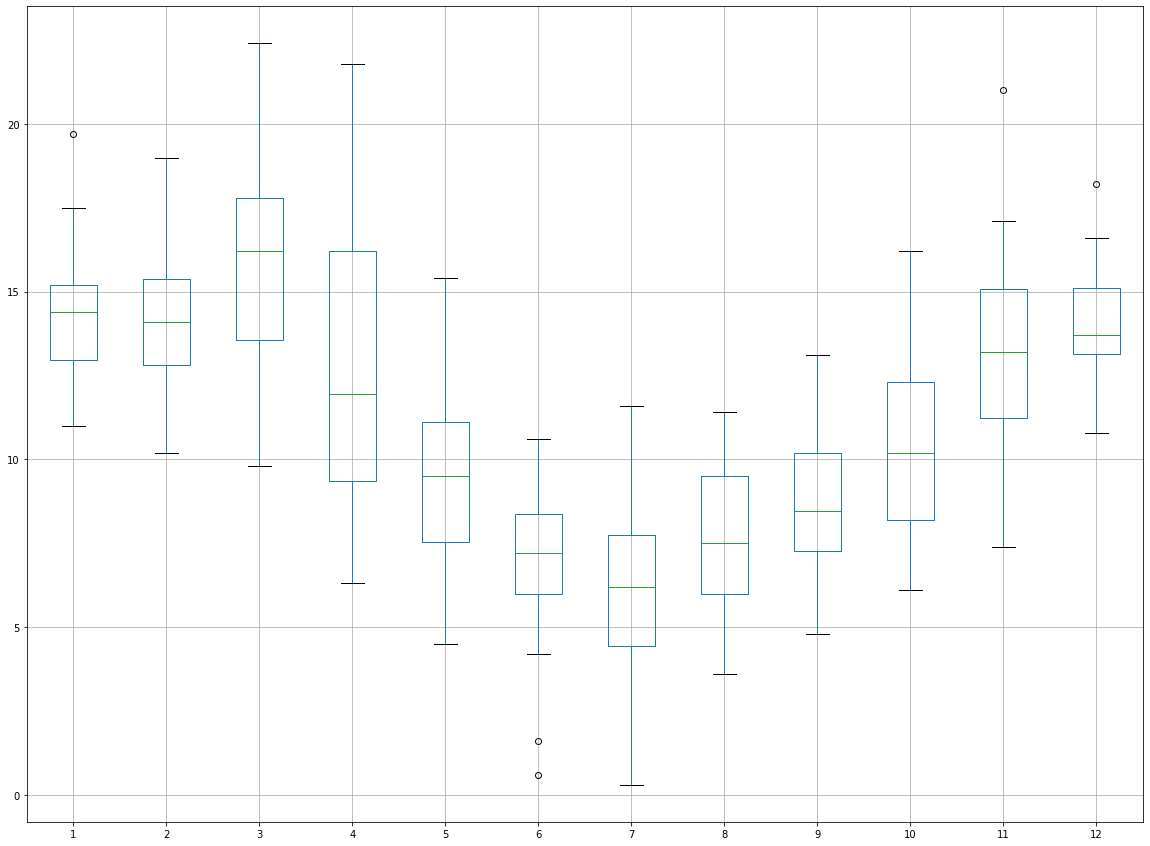

In [65]:
months.boxplot(figsize = (20, 15))

### 4.5.2 绘制热力图

Text(0.5, 1.0, 'heatmap')

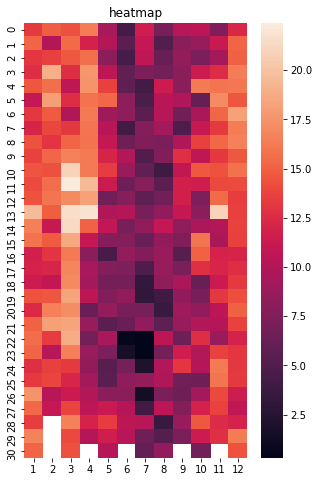

In [66]:
plt.style.use({'figure.figsize': (5,8)})
sns.heatmap(months)
plt.title("heatmap")

## 4.6 小提琴图
类似箱型图，只不过比箱型图更加高级一些

Text(0.5, 1.0, ' minimum temperature distribution of 1982/02 in violinplot ')

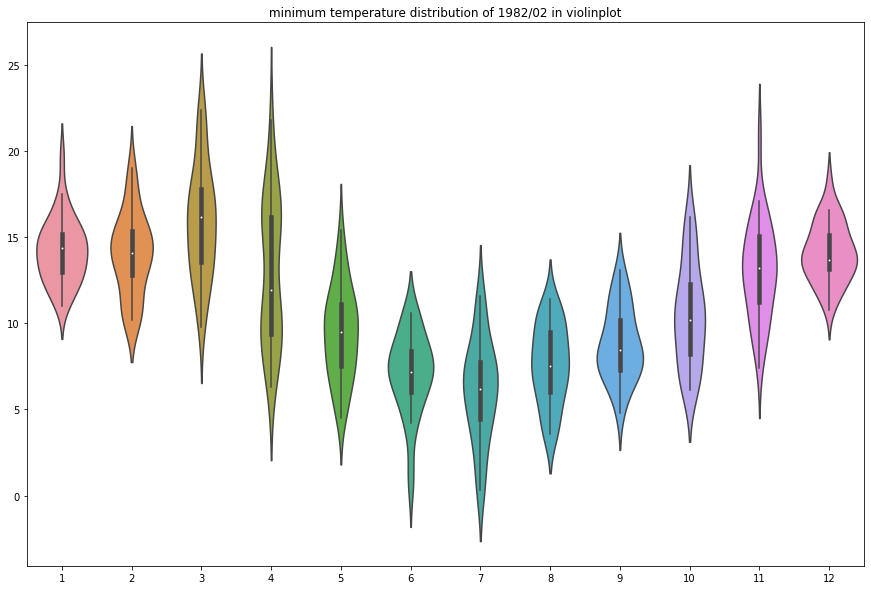

In [67]:
plt.style.use({'figure.figsize' : (15, 10)})

sns.violinplot(data = months)
plt.title(" minimum temperature distribution of 1982/02 in violinplot ")

Text(0.5, 1.0, 'minimum temperature distribution of 1982/02 in violinplot')

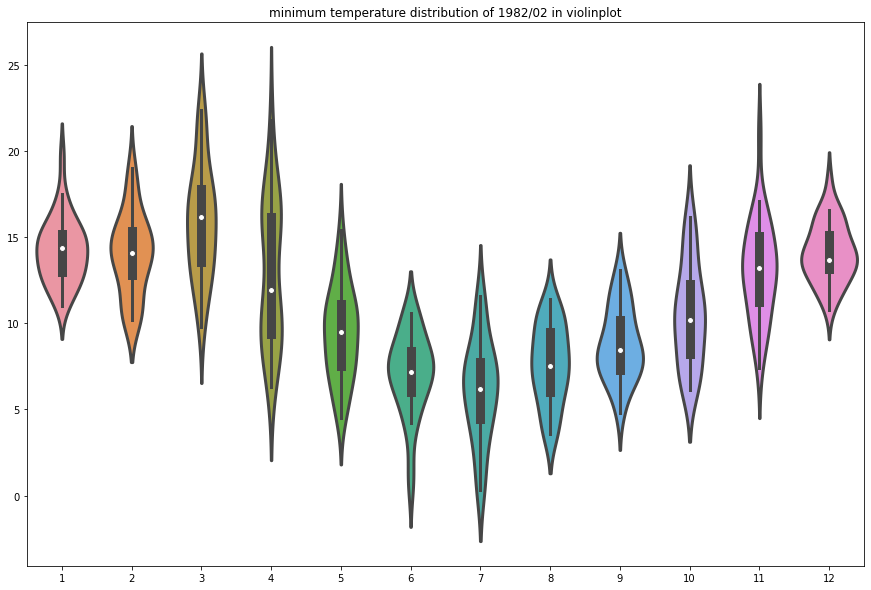

In [68]:
# linewidth参数可以控制线宽
sns.violinplot(data = months, linewidth = 3)
plt.title('minimum temperature distribution of 1982/02 in violinplot')

## 4.6 滞后散点图
时间序列分析假定一个观测值与前面的观测值之间存在一定的关系。

相对于某观察值之前的观测值被称为滞后值，在一个时间步长前的观测值称为滞后一期，在两个时间步长前的观测值称为滞后二期，依次类推。

比如， 对于1982年8月15日的气温数据，8月14日的气温为滞后一期，8月13日的气温为滞后二期

每个观察值之间和其滞后值之间的关系，可以用滞后散点图表示

In [69]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

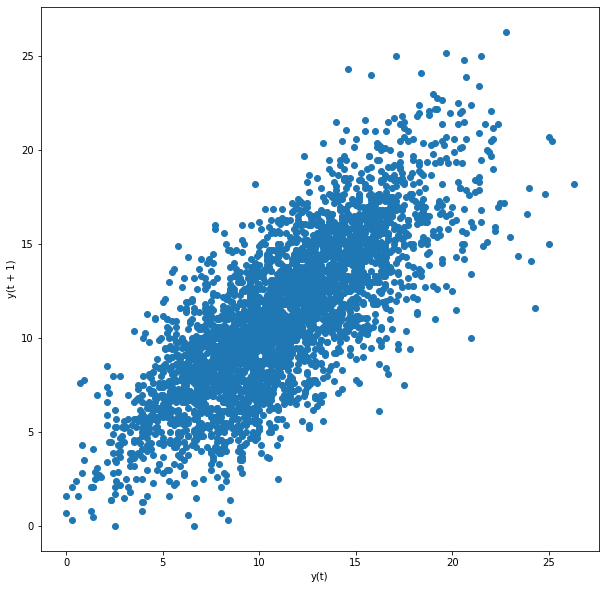

In [70]:
plt.style.use({'figure.figsize' : (10, 10)})
lag_plot(df['Temp'])

散点图聚在左下角到右上角，表示与滞后值正相关。 散点图聚在左上角到右下角，表示与滞后值负相关。 离对角线越紧密，表示相关关系越强。 分散的球状散点图表示相关关系微弱。

横轴表示每天的气温，纵轴表示滞后一天的气温

通过lag参数控制滞后值

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 3)'>

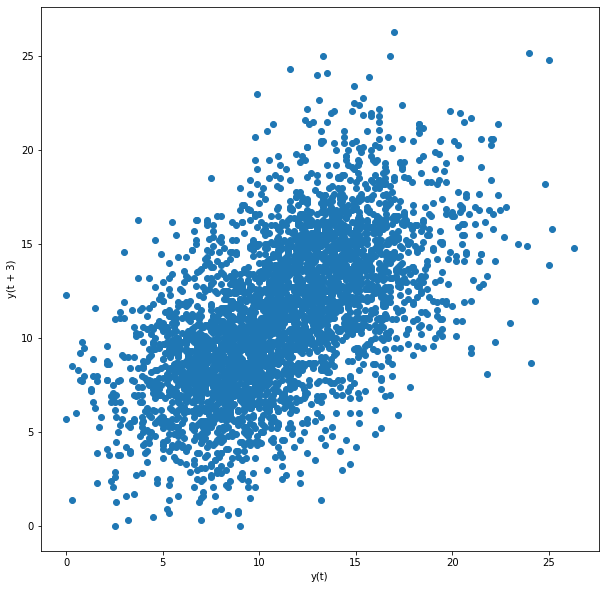

In [71]:
lag_plot(df['Temp'], lag = 3)

绘制不同滞后值对应的散点图：

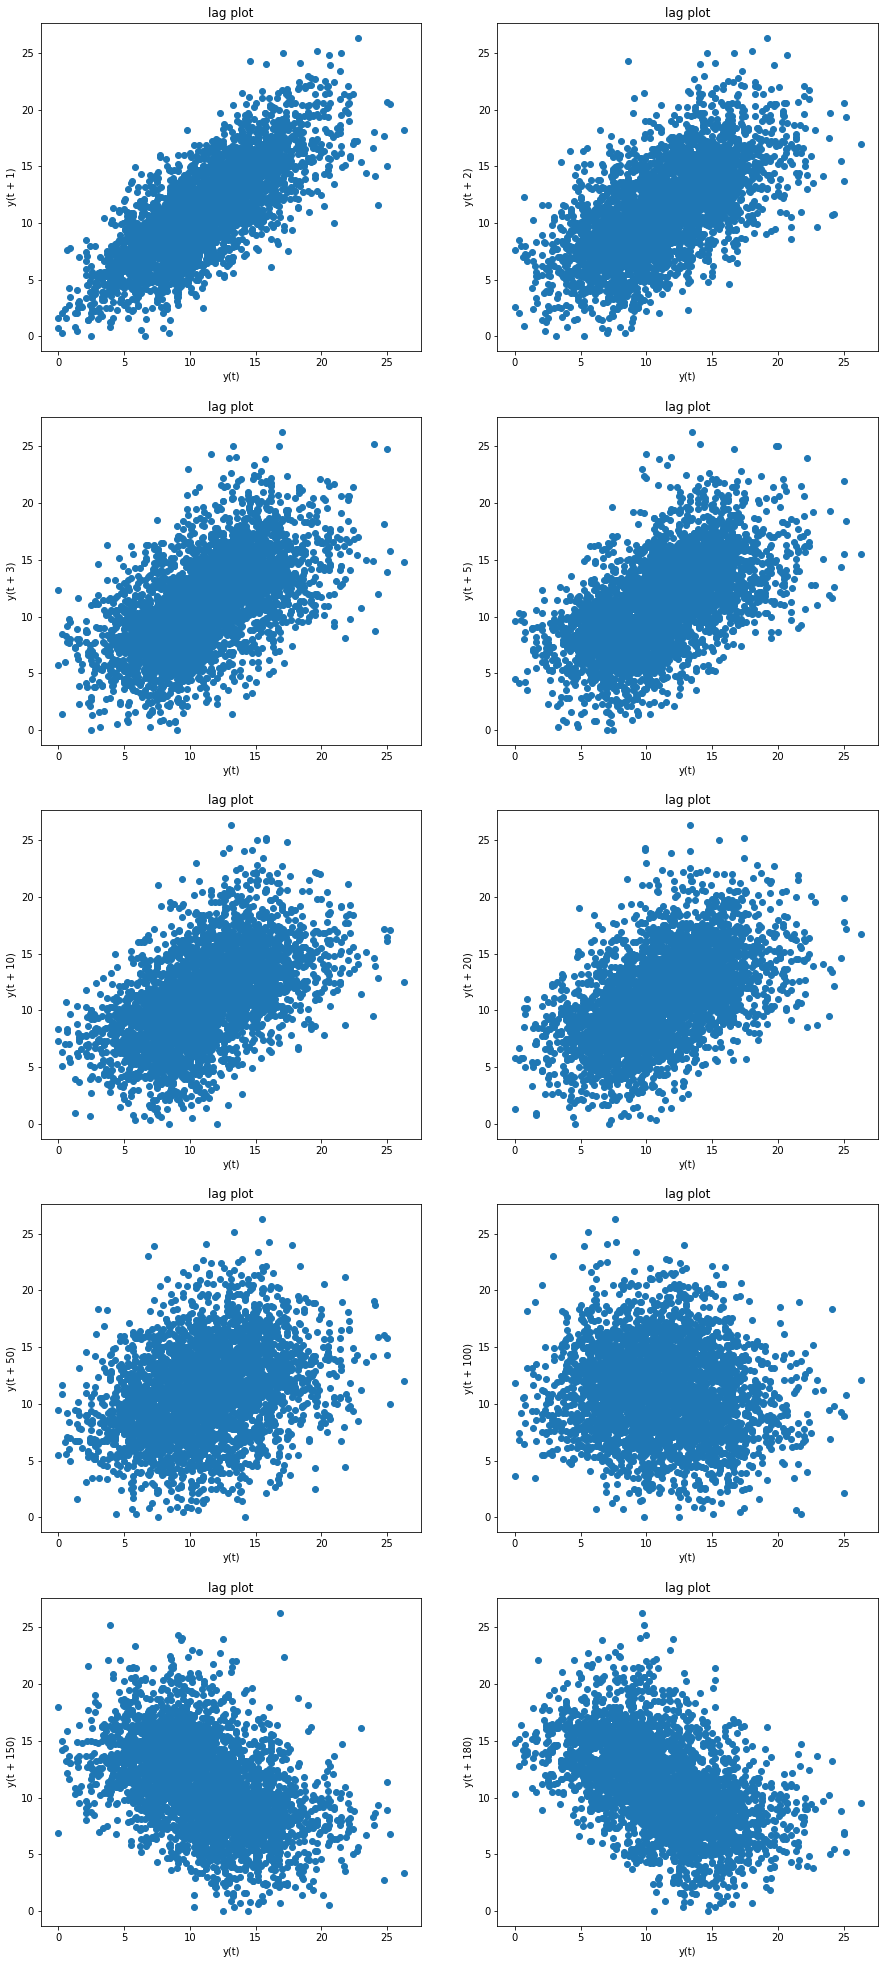

In [73]:
lag_list = [1, 2, 3, 5, 10, 20, 50, 100, 150, 180]
plt.style.use({'figure.figsize' : (15, 35)})

for i in range(len(lag_list)):
    ax = plt.subplot(5, 2, i+1)
    ax.set_title('t vs t+' + str(lag_list[i]))
    lag_plot(df['Temp'], lag = lag_list[i])
    plt.title('lag plot'.format(lag_list[i]))

## 4.7 自相关图
可以看出周期和相关性

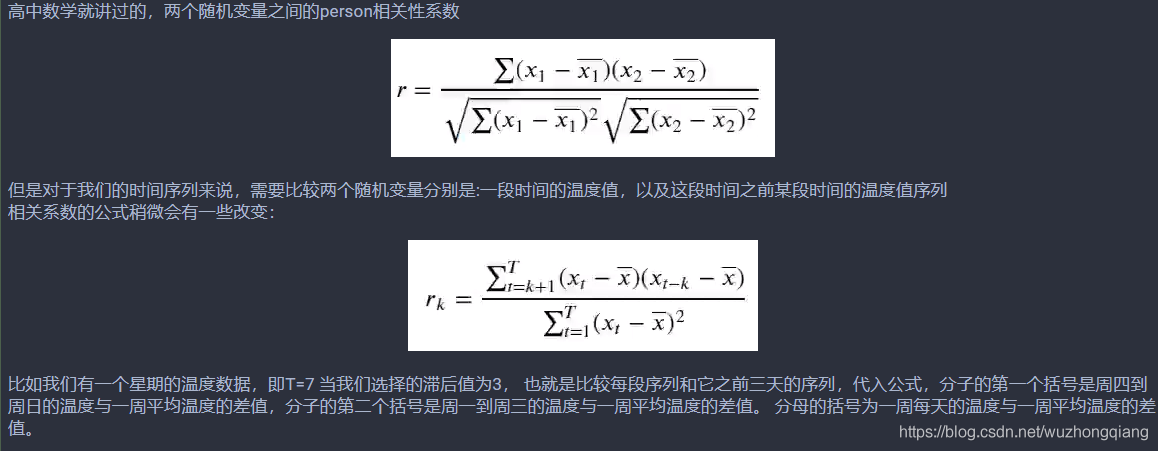


In [74]:
from pandas.plotting import autocorrelation_plot 
import numpy as np

([<matplotlib.axis.YTick at 0x1457e006ae10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

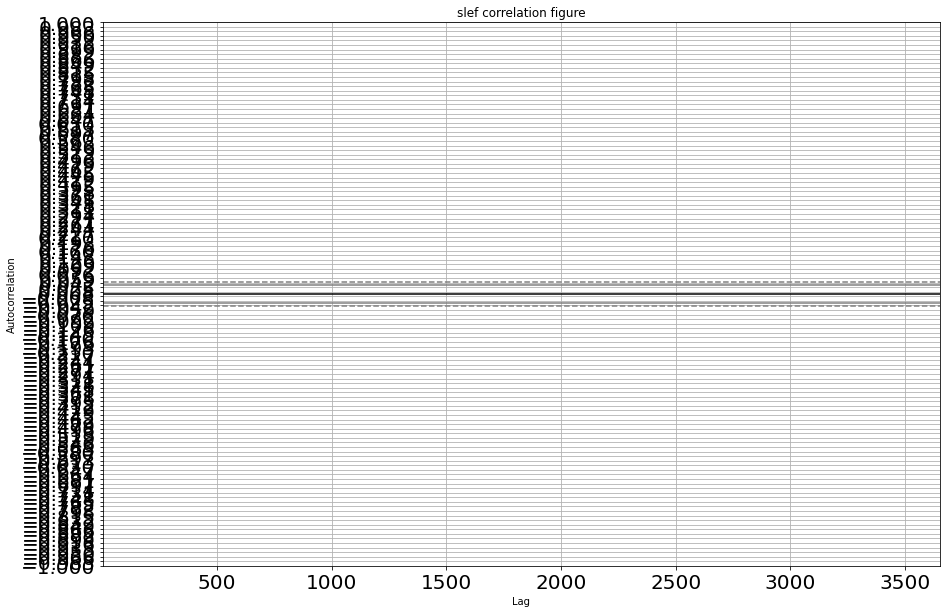

In [75]:
plt.style.use({'figure.figsize' : (15, 10)})
autocorrelation_plot(df['Temp'])
plt.title('slef correlation figure')

plt.tick_params(labelsize = 20)
plt.yticks(np.linspace(-1, 1, 120))

In [76]:
df['Temp']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

比如说横轴是1000， 就表示这个数据集所有数据与它之后1000天的数据的自相关程度。

时间间隔的越远，温度之间的自相关程度就摆动着降低。 并且在时间向远推进的过程中，还会出现周期性的波动，这是由季节的周期性更迭造成的

如果我们随机取点绘制滞后图和自相关图，就会发现完全没有规律

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

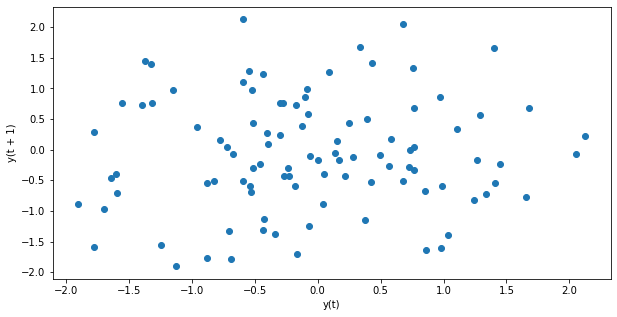

In [77]:
plt.style.use({'figure.figsize':(10, 5)})

a = np.random.randn(100)
a = pd.Series(a)
lag_plot(a)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

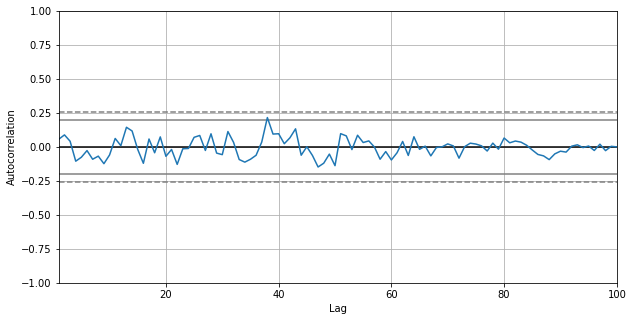

In [78]:
autocorrelation_plot(a)

# 5. 时间数据的特征工程
将单纯的日期维度扩展成更多维度，构造更多的输入给模型的特征，增强数据的可解释性，更接近人的业务逻辑。

* 哪一年
* 哪一个月
* 星期几
* 这个月的第几天
* 月初还是月末
* 一年当中的第几天
* 一年当中的第几个月

In [103]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [208]:
df2 = pd.read_csv("Melbourne_daily_temp/data/daily-minimum-temperatures-in-me.csv")
df2.describe()

Date  \
count         3650   
unique        3650   
top     1987-03-05   
freq             1   

       Daily minimum temperatures in Melbourne, Australia, 1981-1990  
count                                                3650             
unique                                                230             
top                                                  10.0             
freq                                                   51

In [185]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Date                                                           3650 non-null   object
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [209]:

df2 = df2.rename(columns={'Daily minimum temperatures in Melbourne, Australia, 1981-1990':'Temp','Date':'Date' })
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Temp'] = pd.to_numeric(df2['Temp'],errors='coerce')

In [187]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [211]:
df2 = df2.dropna(axis = 0, how = 'any')

In [213]:
print(len(df2))

3647


## 5.1 把年月日作为特征构造成列

In [216]:
# 构造新的一列： 年
df2.loc[:, 'year'] = df2['Date'].apply(lambda x: x.year)

# 构造新的一列： 月
df2.loc[:, 'month'] = df2['Date'].apply(lambda x: x.month)

# # 构造新的一列： 星期几
df2.loc[:, 'dow'] = df2['Date'].apply(lambda x:x.dayofweek)

# # 构造新的一列： 一个月第几天
df2.loc[:, 'dom'] = df2['Date'].apply(lambda x: x.day)


In [217]:
df2.head()

Date  Temp  year  month  dow  dom
0 1981-01-01  20.7  1981      1    3    1
1 1981-01-02  17.9  1981      1    4    2
2 1981-01-03  18.8  1981      1    5    3
3 1981-01-04  14.6  1981      1    6    4
4 1981-01-05  15.8  1981      1    0    5

## 5.2 是不是周末，是不是周六，是不是周日

In [218]:
# 构造新的三列： 是不是周末、是不是周六、是不是周日
df2.loc[:, 'weekend'] = df2['Date'].apply(lambda x:x.dayofweek > 4)
df2.loc[:, 'weekend_sat'] = df2['Date'].apply(lambda x: x.dayofweek == 5)
df2.loc[:, 'weekend_sun'] = df2['Date'].apply(lambda x: x.dayofweek == 6)

## 5.3 添加上半月和下半月的信息

In [219]:
# 添加上半月和下半月的信息
def half_month(day):
    if day in range(1, 16):
        return 1
    else:
        return 2

df2.loc[:, 'half_month'] = df2['dom'].apply(lambda x:half_month(x))

 ## 5.4 添加每个月上中下旬的信息

In [220]:
def tree_part_month(day):
    if day in range(1, 11):
        return 1
    elif day in range(11, 21):
        return 2
    else:
        return 3
df2.loc[:, 'three_part_month'] = df2['dom'].apply(lambda x: tree_part_month(x))

## 5.5 添加每个月四个星期的信息 一个月的第几个星期

In [221]:
def four_week_month(day):
    if day in range(1, 8):
        return 1
    elif day in range(8, 15):
        return 2
    elif day in range(15, 22):
        return 3
    else:
        return 4
df2.loc[:, 'four_week_month'] = df2['dom'].apply(lambda x: four_week_month(x))
    

## 5.6 添加节假日信息

In [222]:
df2.loc[:, 'festival'] = 0
df2.loc[ (df2.month == 1) & (df2.dom < 4), 'festival'] = 1

## 5.7 one-hot encoding

In [223]:
## copy previous data
prev_dummy_df = df2.copy()

drop_columns = ['Date', 'Temp']
x_prev_dummy = prev_dummy_df.drop(drop_columns, axis = 1)

## one hot encoding
columns_to_encoding = ['year', 'month', 'dow', 'dom','three_part_month', 'four_week_month']

dummy_x = pd.get_dummies(x_prev_dummy, columns= columns_to_encoding)

In [225]:
Y = df2['Temp']

In [230]:
print(Y)

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 3647, dtype: float64


In [229]:
print(dummy_x['weekend'])

0       False
1       False
2        True
3        True
4       False
        ...  
3645    False
3646    False
3647     True
3648     True
3649    False
Name: weekend, Length: 3647, dtype: bool


In [180]:
dummy_x

weekend  weekend_sat  weekend_sun  half_month  festival  year_1981  \
0       False        False        False           1         1          1   
1       False        False        False           1         1          1   
2        True         True        False           1         1          1   
3        True        False         True           1         0          1   
4       False        False        False           1         0          1   
...       ...          ...          ...         ...       ...        ...   
3645    False        False        False           2         0          0   
3646    False        False        False           2         0          0   
3647     True         True        False           2         0          0   
3648     True        False         True           2         0          0   
3649    False        False        False           2         0          0   

      year_1982  year_1983  year_1984  year_1985  ...  dom_29  dom_30  dom_31  \
0             0          0          0          0  ...       0       0       0   
1             0          0          0          0  ...       0       0       0   
2             0          0          0          0  ...       0       0       0   
3             0          0          0          0  ...       0       0       0   
4             0          0          0          0  ...       0       0       0   
...         ...        ...        ...        ...  ...     ...     ...     ...   
3645          0          0          0          0  ...       0       0       0   
3646          0          0          0          0  ...       0       0       0   
3647          0          0          0          0  ...       1       0       0   
3648          0          0          0          0  ...       0       1       0   
3649          0          0          0          0  ...       0       0       1   

      three_part_month_1  three_part_month_2  three_part_month_3  \
0                      1                   0                   0   
1                      1                   0                   0   
2                      1                   0                   0   
3                      1                   0                   0   
4                      1                   0                   0   
...                  ...                 ...                 ...   
3645                   0                   0                   1   
3646                   0                   0                   1   
3647                   0                   0                   1   
3648                   0                   0                   1   
3649                   0                   0                   1   

      four_week_month_1  four_week_month_2  four_week_month_3  \
0                     1                  0                  0   
1                     1                  0                  0   
2                     1                  0                  0   
3                     1                  0                  0   
4                     1                  0                  0   
...                 ...                ...                ...   
3645                  0                  0                  0   
3646                  0                  0                  0   
3647                  0                  0                  0   
3648                  0                  0                  0   
3649                  0                  0                  0   

      four_week_month_4  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
3645                  1  
3646                  1  
3647                  1  
3648                  1  
3649                  1  

[3650 rows x 72 columns]

# 6. 机器学习模型的回归拟合
* 多元线性回归
* 多项式回归
* 岭回归
* 决策树和随机森林
* 支持向量机
* 多层感知机（多层神经网络）

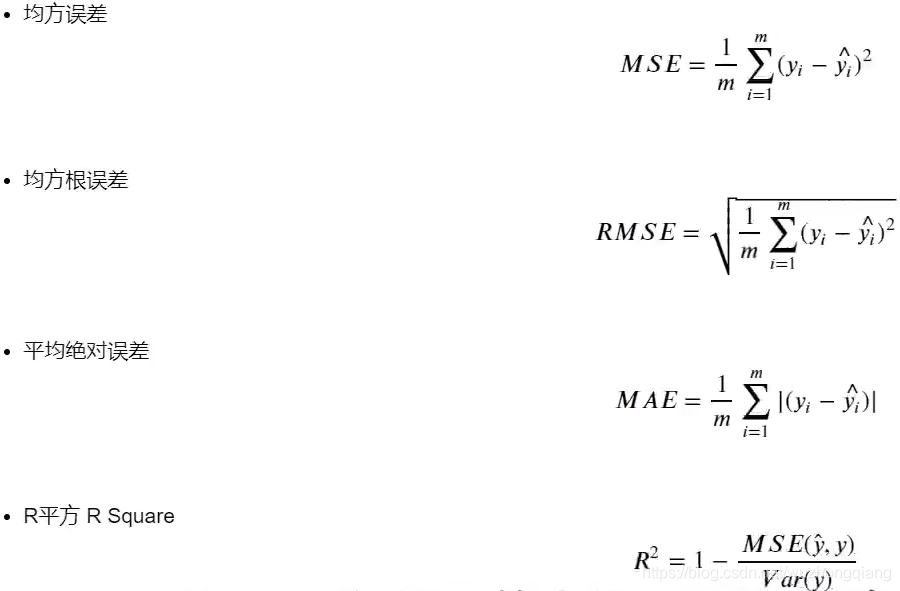

## 6.1 linear regression
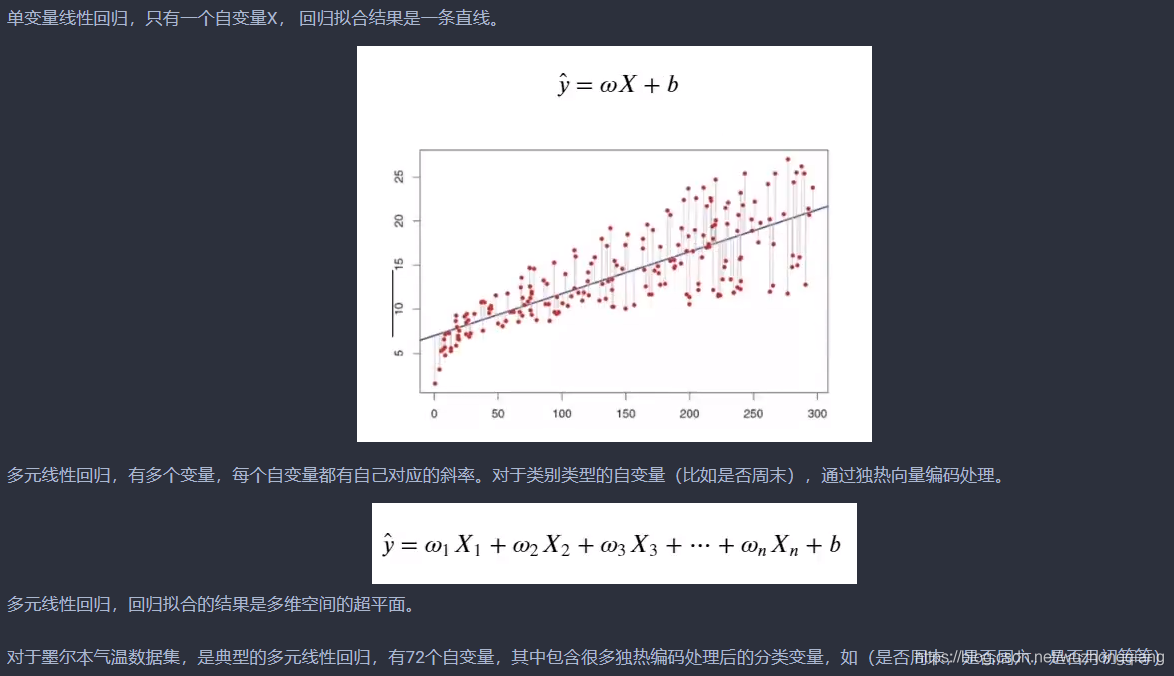

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [231]:
x_train, x_test, y_train, y_test = train_test_split(dummy_x, Y, test_size = 0.2 , random_state = 1, shuffle = True)

y_train


394     17.1
2381     7.9
3412     4.9
750     15.4
673     13.6
        ... 
2766     8.4
907      3.9
1098    12.0
235      6.6
1063    17.6
Name: Temp, Length: 2917, dtype: float64

In [233]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [255]:
x_train

weekend  weekend_sat  weekend_sun  half_month  festival  year_1981  \
394      True         True        False           2         0          0   
2381     True         True        False           1         0          0   
3412    False        False        False           1         0          0   
750     False        False        False           2         0          0   
673     False        False        False           1         0          0   
...       ...          ...          ...         ...       ...        ...   
2766     True         True        False           2         0          0   
907     False        False        False           2         0          0   
1098    False        False        False           1         0          0   
235     False        False        False           2         0          1   
1063    False        False        False           2         0          0   

      year_1982  year_1983  year_1984  year_1985  ...  dom_29  dom_30  dom_31  \
394           1          0          0          0  ...       0       1       0   
2381          0          0          0          0  ...       0       0       0   
3412          0          0          0          0  ...       0       0       0   
750           0          1          0          0  ...       0       0       0   
673           1          0          0          0  ...       0       0       0   
...         ...        ...        ...        ...  ...     ...     ...     ...   
2766          0          0          0          0  ...       0       1       0   
907           0          1          0          0  ...       0       0       0   
1098          0          0          1          0  ...       0       0       0   
235           0          0          0          0  ...       0       0       0   
1063          0          1          0          0  ...       0       1       0   

      three_part_month_1  three_part_month_2  three_part_month_3  \
394                    0                   0                   1   
2381                   0                   1                   0   
3412                   1                   0                   0   
750                    0                   0                   1   
673                    1                   0                   0   
...                  ...                 ...                 ...   
2766                   0                   0                   1   
907                    0                   0                   1   
1098                   1                   0                   0   
235                    0                   0                   1   
1063                   0                   0                   1   

      four_week_month_1  four_week_month_2  four_week_month_3  \
394                   0                  0                  0   
2381                  0                  1                  0   
3412                  0                  1                  0   
750                   0                  0                  1   
673                   1                  0                  0   
...                 ...                ...                ...   
2766                  0                  0                  0   
907                   0                  0                  0   
1098                  1                  0                  0   
235                   0                  0                  0   
1063                  0                  0                  0   

      four_week_month_4  
394                   1  
2381                  0  
3412                  0  
750                   0  
673                   0  
...                 ...  
2766                  1  
907                   1  
1098                  0  
235                   1  
1063                  1  

[2917 rows x 72 columns]

In [259]:
dummy_x.to_csv('dummy_x.csv', index = False)
Y.to_csv('Y.csv', index = False)

In [257]:
x_train.to_csv('x_train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)

In [258]:
x_test.to_csv('x_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

In [234]:
print('intercept', lr.intercept_)
print('slop', lr.coef_)

intercept -48617013753243.26
slop [-5.44124441e+12 -9.50798519e+13 -1.84009423e+13  3.84539843e+12
  2.97828674e-01 -6.24953682e+13 -6.24953682e+13 -6.24953682e+13
 -6.24953682e+13 -6.24953682e+13 -6.24953682e+13 -6.24953682e+13
 -6.24953682e+13 -6.24953682e+13 -6.24953682e+13  7.52610640e+13
  7.52610640e+13  7.52610640e+13  7.52610640e+13  7.52610640e+13
  7.52610640e+13  7.52610640e+13  7.52610640e+13  7.52610640e+13
  7.52610640e+13  7.52610640e+13  7.52610640e+13 -8.10787642e+12
 -8.10787642e+12 -8.10787642e+12 -8.10787642e+12 -8.10787642e+12
  9.24132199e+13  1.57343103e+13  5.56068421e+13  5.56068421e+13
  5.56068421e+13  5.56068421e+13  5.56068421e+13  5.56068421e+13
  5.56068421e+13 -1.19593261e+14 -1.19593261e+14 -1.19593261e+14
 -1.74011291e+13 -1.74011291e+13 -1.74011291e+13 -1.74011291e+13
 -5.46543758e+12 -9.31083600e+12 -9.31083600e+12 -9.31083600e+12
 -9.31083600e+12 -9.31083600e+12 -1.21267299e+14  1.01257343e+13
  1.01257343e+13  1.01257343e+13  1.01257343e+13  1.0125